## Additional Learning Resources
Refer to [scikit-learn documentation](https://scikit-learn.org/stable/) and the [Pandas user guide](https://pandas.pydata.org/docs/) for detailed explanations of the functions used in this notebook.
For a quick refresher on splitting data:
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```


# Feature Expansion

### 🎯 Goal: create polynomial features from your data

Why do we do feature engineering?
* To transform the data so we can feed it into the model
* To encode our knowledge about what is useful for our model

Data cleaning:
* Dealing with missing values
* Sanity checks (are there non-missing values masking as missing values)

In the general case/workflow, you do data cleaning before feature engineering, but in reality the tools we use for both (i.e. plotting all the things, printing out data statistics, etc) will be the same.

In [92]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

You can load the Anscombe Quartet data directly from seaborn.

In [18]:
df = sns.load_dataset("anscombe")

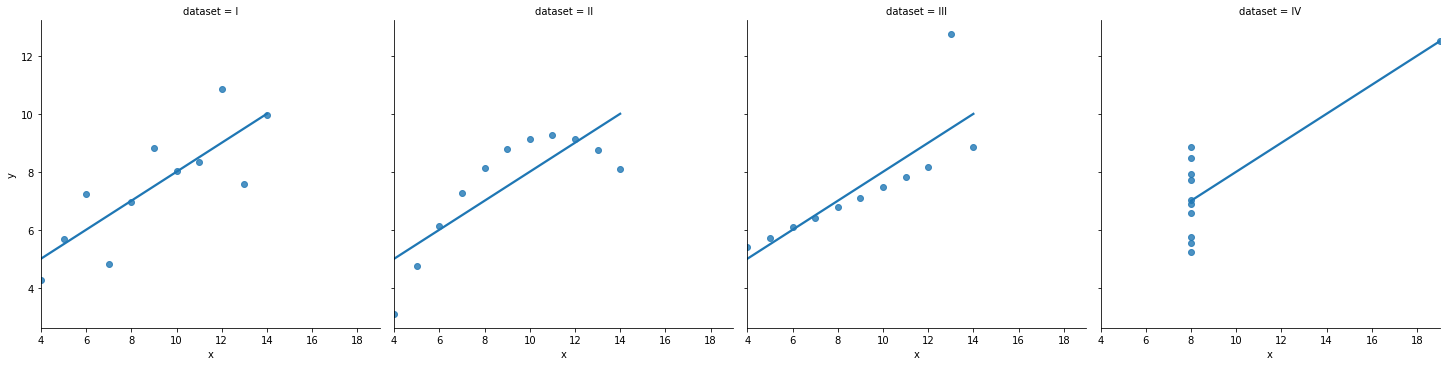

In [19]:
sns.lmplot(x='x', y='y', data=df, col='dataset', ci=False)

In [20]:
df = df[df['dataset'] == 'II'][['x', 'y']]

<AxesSubplot:xlabel='x', ylabel='y'>

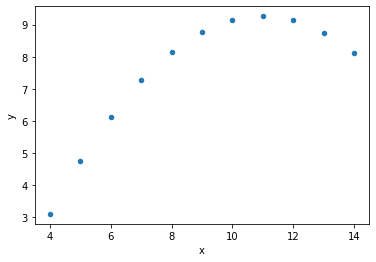

In [21]:
df.plot(kind='scatter', x='x', y='y')

In [22]:
df['y'] = df['y'] + 0.5*np.random.randn(len(df['y']))

<AxesSubplot:xlabel='x', ylabel='y'>

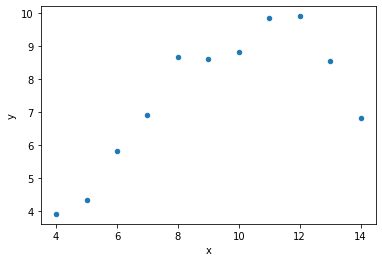

In [23]:
df.plot(kind='scatter', x='x', y='y')

In [34]:
X = df[['x']]
y = df['y']

In [35]:
m = LinearRegression()

In [36]:
m.fit(X, y)

LinearRegression()

In [37]:
y_pred = m.predict(X)

In [38]:
# R2 score: larger is better
m.score(X, y)

0.5206063371612613

In [39]:
# RMSLE score: lower is better
np.sqrt(mean_squared_log_error(y, y_pred))

0.16663655782944797

In [40]:
df['y_pred'] = y_pred

<AxesSubplot:xlabel='x', ylabel='y'>

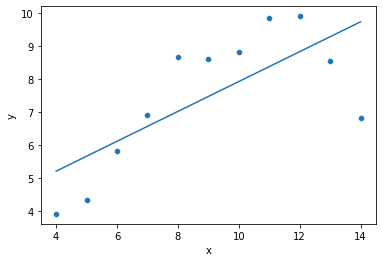

In [41]:
sns.scatterplot(data=df, x='x', y='y')
sns.lineplot(data=df, x='x', y='y_pred')

In [42]:
X = X.copy()

In [53]:
X

,x,x2
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0
16,14.0,196.0
17,6.0,36.0
18,4.0,16.0
19,12.0,144.0
20,7.0,49.0


In [43]:
X['x2'] = X['x']**2

In [45]:
m.fit(X, y)

LinearRegression()

In [49]:
y_pred_poly = m.predict(X)

In [46]:
# R2 score: larger is better
m.score(X, y)

0.9163749251076745

In [50]:
# RMSLE score: lower is better
np.sqrt(mean_squared_log_error(y, y_pred_poly))

0.08180415097800149

In [51]:
df['y_pred_poly'] = y_pred_poly

<AxesSubplot:xlabel='x', ylabel='y'>

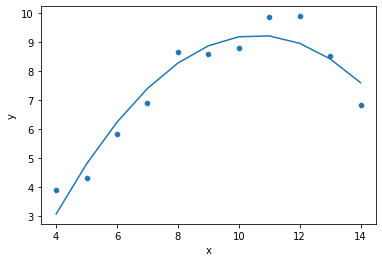

In [52]:
sns.scatterplot(data=df, x='x', y='y')
sns.lineplot(data=df, x='x', y='y_pred_poly')

In [54]:
m.coef_, m.intercept_

(array([ 2.99550043, -0.141276  ]), -6.635910995937367)

### Feature expansion with scikit-learn

#### Polynomial features

In [55]:
pt = PolynomialFeatures(degree=3, include_bias=False)

In [56]:
pt.fit(X[['x']])

PolynomialFeatures(degree=3, include_bias=False)

In [57]:
poly_features = pt.transform(X[['x']])

In [59]:
pd.DataFrame(poly_features, columns=pt.get_feature_names())

,x0,x0^2,x0^3
0,10.0,100.0,1000.0
1,8.0,64.0,512.0
2,13.0,169.0,2197.0
3,9.0,81.0,729.0
4,11.0,121.0,1331.0
5,14.0,196.0,2744.0
6,6.0,36.0,216.0
7,4.0,16.0,64.0
8,12.0,144.0,1728.0
9,7.0,49.0,343.0


#### Interaction terms

In [77]:
pt = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

In [78]:
pt.fit(X)

PolynomialFeatures(include_bias=False, interaction_only=True)

In [79]:
X.head()

,x,x2
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0


In [80]:
interaction_features = pt.transform(X)

In [81]:
pd.DataFrame(interaction_features, columns=pt.get_feature_names())

,x0,x1,x0 x1
0,10.0,100.0,1000.0
1,8.0,64.0,512.0
2,13.0,169.0,2197.0
3,9.0,81.0,729.0
4,11.0,121.0,1331.0
5,14.0,196.0,2744.0
6,6.0,36.0,216.0
7,4.0,16.0,64.0
8,12.0,144.0,1728.0
9,7.0,49.0,343.0


Let's look at the bike demand dataset:

In [86]:
df = pd.read_csv('../data/train.csv', parse_dates=['datetime'])

In [89]:
df['hour'] = df['datetime'].dt.hour

In [90]:
df = df.sort_values(by='hour')

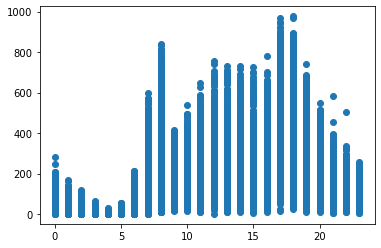

In [93]:
plt.scatter(df['hour'], df['count'])

<AxesSubplot:xlabel='hour'>

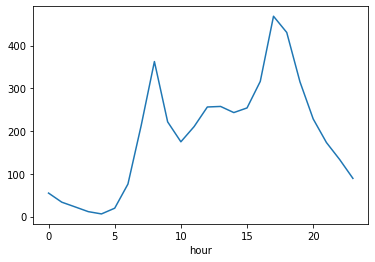

In [121]:
df.groupby('hour')['count'].mean().plot()

In [109]:
pt = PolynomialFeatures(degree=8)

In [110]:
pt.fit(df[['hour']])

PolynomialFeatures(degree=8)

In [111]:
poly_hour = pt.transform(df[['hour']])

In [117]:
pd.DataFrame(poly_hour, columns=pt.get_feature_names())

,1,x0,x0^2,x0^3,x0^4,x0^5,x0^6,x0^7,x0^8
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
10881,1.0,23.0,529.0,12167.0,279841.0,6436343.0,148035889.0,3.404825e+09,7.831099e+10
10882,1.0,23.0,529.0,12167.0,279841.0,6436343.0,148035889.0,3.404825e+09,7.831099e+10
10883,1.0,23.0,529.0,12167.0,279841.0,6436343.0,148035889.0,3.404825e+09,7.831099e+10
10884,1.0,23.0,529.0,12167.0,279841.0,6436343.0,148035889.0,3.404825e+09,7.831099e+10


In [113]:
m.fit(poly_hour, df['count'])

LinearRegression()

In [114]:
y_pred = m.predict(poly_hour)

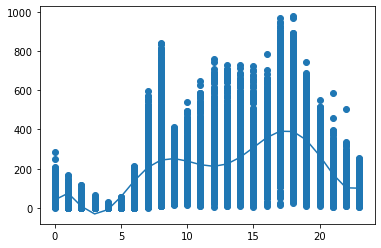

In [115]:
plt.scatter(df['hour'], df['count'])
plt.plot(df['hour'], y_pred)

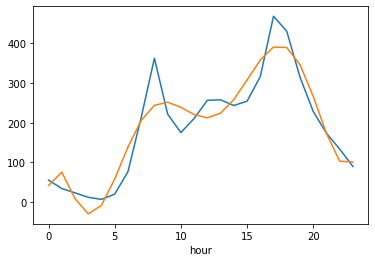

In [120]:
df.groupby('hour')['count'].mean().plot()
plt.plot(df['hour'], y_pred)

<AxesSubplot:xlabel='weather'>

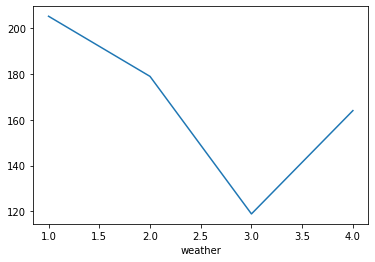

In [122]:
df.groupby('weather')['count'].mean().plot()

In [124]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

DROP THE `weather=4` DATA POINT!

In [125]:
pt.fit(df[['hour', 'weather']])

PolynomialFeatures(degree=8)

In [126]:
poly_hour = pt.transform(df[['hour', 'weather']])

In [127]:
pd.DataFrame(poly_hour, columns=pt.get_feature_names())

,1,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3,...,x1^7,x0^8,x0^7 x1,x0^6 x1^2,x0^5 x1^3,x0^4 x1^4,x0^3 x1^5,x0^2 x1^6,x0 x1^7,x1^8
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0,...,128.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,256.0
2,1.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0,...,128.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,256.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,1.0,23.0,1.0,529.0,23.0,1.0,12167.0,529.0,23.0,1.0,...,1.0,7.831099e+10,3.404825e+09,148035889.0,6436343.0,279841.0,12167.0,529.0,23.0,1.0
10882,1.0,23.0,2.0,529.0,46.0,4.0,12167.0,1058.0,92.0,8.0,...,128.0,7.831099e+10,6.809651e+09,592143556.0,51490744.0,4477456.0,389344.0,33856.0,2944.0,256.0
10883,1.0,23.0,2.0,529.0,46.0,4.0,12167.0,1058.0,92.0,8.0,...,128.0,7.831099e+10,6.809651e+09,592143556.0,51490744.0,4477456.0,389344.0,33856.0,2944.0,256.0
10884,1.0,23.0,2.0,529.0,46.0,4.0,12167.0,1058.0,92.0,8.0,...,128.0,7.831099e+10,6.809651e+09,592143556.0,51490744.0,4477456.0,389344.0,33856.0,2944.0,256.0


Tips for doing feature expansion right:
* If you are using higher degree polynomial features, in most cases use just the column you believe has higher degree polynomial dependance. Adding more feature to PolynomialFeatures transformer will result in your X exploding.
* If you believe you have an interaction between some features, use PolynomialFeatures with `interaction_only=True`.